In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

import matplotlib.font_manager

In [2]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
top5_countries = (
    df
    .assign(
        total_revenue=df["LodgingRevenue"] + df["OtherRevenue"]
    )
).groupby("Nationality")["total_revenue"].sum().sort_values(ascending=False).iloc[0:5].index
top5_countries

Index(['FRA', 'DEU', 'PRT', 'GBR', 'ESP'], dtype='object', name='Nationality')

In [19]:
plot_df = (
    df[df["Nationality"].isin(top5_countries)]
    .assign(
        total_revenue=df["LodgingRevenue"] + df["OtherRevenue"]
    )
).loc[:, ["Nationality", "total_revenue"]]
plot_df

,Nationality,total_revenue
0,PRT,476.3
1,PRT,333.0
2,DEU,0.0
3,FRA,300.0
4,FRA,0.0
...,...,...
83579,PRT,0.0
83580,DEU,323.0
83581,DEU,0.0
83582,FRA,145.0


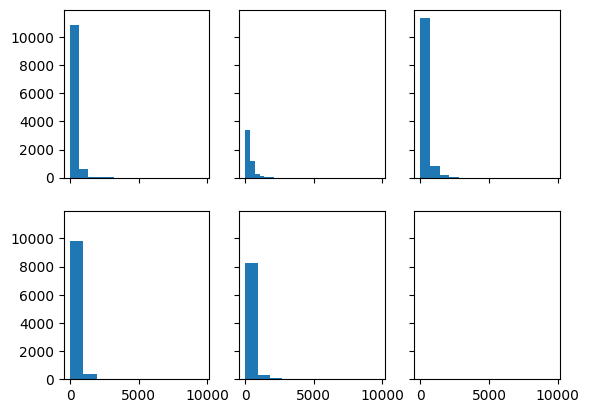

In [31]:
fig, ax = plt.subplots(2,3, sharey="all", sharex="all")

ax[0][0].hist(
    df.query("Nationality == 'PRT' and RoomNights < 15").loc[:, "LodgingRevenue"],
)
ax[0][1].hist(
    df.query("Nationality == 'ESP' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][2].hist(
    df.query("Nationality == 'FRA' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][0].hist(
    df.query("Nationality == 'DEU' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][1].hist(
    df.query("Nationality == 'GBR' and RoomNights < 15").loc[:, "LodgingRevenue"]
)

plt.show()

In [ ]:
df = df.assign(
    date=pd.to_datetime("2018-12-31") - pd.to_timedelta(df["DaysSinceCreation"], unit="D"),
    total_revenue = df["LodgingRevenue"] + df["OtherRevenue"]
).sort_values("date")
df.dtypes

In [43]:
line_plt_df = (
    df
    .set_index("date")
    .loc[:, ["LodgingRevenue", "OtherRevenue"]]
    .resample("ME").sum()
)
line_plt_df.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


In [48]:
bar_plt_df = (
    df
    .groupby("Nationality")["total_revenue"].sum()
    .sort_values(ascending=False)
).iloc[0: 5]
bar_plt_df

Nationality
FRA    4842481.89
DEU    3838924.08
PRT    3380643.30
GBR    3284336.38
ESP    1795750.15
Name: total_revenue, dtype: float64

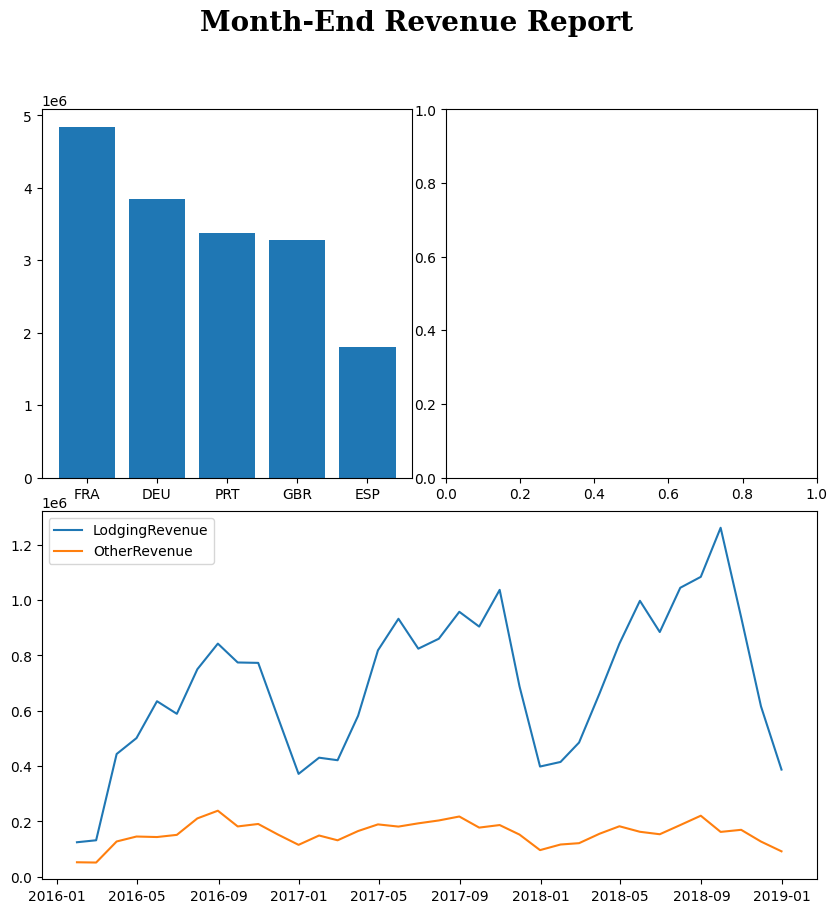

In [66]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(ncols=4, nrows = 4)

fig.suptitle(
    "Month-End Revenue Report", fontsize=20, fontweight="bold", fontfamily="serif"
)

ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0:2, 2:])
ax3 = fig.add_subplot(gs[2:, :])

ax1.bar(
    bar_plt_df.index,
    bar_plt_df
)

ax3.plot(
    line_plt_df,
    label=line_plt_df.columns
)

ax3.legend()

plt.show()

In [62]:
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\COPRGTL.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\palai.ttf',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\lucon.ttf',
 'C:\\Windows\\Fonts\\ITCKRIST.TTF',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\Windows\\Fonts\\BOD_BLAI.TTF',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\calibri.ttf',
 'C:\\Windows\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\Windows\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\DUBAI-REGULAR.TTF',
 'C:\\Windows\\Fonts\\corbelz.ttf',
 'C:\\Windows\\Fonts\\sym

In [68]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [69]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b